In [1]:
import pandas as pd # importing the Pandas package with an alias, pd
from sqlalchemy import create_engine, text # Importing the SQL interface. If this fails, run !pip install sqlalchemy in another cell.
import matplotlib.pyplot as plt
import seaborn as sns


# Create an engine for the database
engine = create_engine('sqlite:///MD_agric_exam-4313.csv') #Make sure to have the .db file in the same directory as this notebook, and the file name matches.

In [3]:
pd.read_csv('MD_agric_exam-4313.csv')

,Field_ID,Elevation,Rainfall,Min_temperature_C,Max_temperature_C,pH,Pollution_level,Plot_size,Annual_yield,Crop_type
0,1162,494.95615,1507.6,-5.4,31.0,6.859436,0.007034,3.6,1.617421,coffee
1,5108,663.73390,581.0,-4.7,30.9,5.603219,0.289643,4.2,2.532497,potato
2,3504,396.87990,1715.1,-6.1,31.7,5.774116,0.000409,2.6,1.262207,banana
3,5351,594.80370,1748.0,-4.3,33.6,6.477415,0.088777,7.9,4.351564,wheat
4,905,609.49800,1395.8,-4.5,31.3,5.419586,0.050023,10.8,5.034791,cassava
...,...,...,...,...,...,...,...,...,...,...
995,2202,572.95935,625.6,-5.5,31.0,5.258964,0.086330,1.2,0.750675,wheat
996,2531,552.80945,398.1,-5.9,33.4,4.607136,0.130178,0.8,0.449790,wheat
997,1040,678.22504,564.4,-4.6,31.7,5.567556,0.448149,1.2,0.492988,maize
998,58,792.65370,928.5,-3.3,31.2,5.102048,0.387350,1.1,0.597557,potato


In [5]:
import pandas as pd

# Replace "path/to/your/file.csv" with the actual path to your file
df = pd.read_csv("MD_agric_exam-4313.csv")

# Assuming the column containing crop types is named "crop_type" (change if different)
unique_crop_types = df["Crop_type"].nunique()

print(f"Number of unique crop types: {unique_crop_types}")


Number of unique crop types: 8


In [6]:
import pandas as pd

# Replace "path/to/your/file.csv" with the actual path to your file
df = pd.read_csv("MD_agric_exam-4313.csv")

# Assuming the columns are named "crop_type" and "yield" (change if different)
# Filter rows for wheat
wheat_data = df[df["Crop_type"] == "wheat"]

# Find maximum yield and round to 2 decimal places
max_yield = wheat_data["Annual_yield"].max()

print(f"Maximum annual yield for 'wheat': {max_yield:.2f}")



Maximum annual yield for 'wheat': 8.99


In [7]:
import pandas as pd

# Replace "path/to/your/file.csv" with the actual path to your file
df = pd.read_csv("MD_agric_exam-4313.csv")

# Assuming the columns are named "crop_type", "pollution_level", and "rainfall" (change if different)
# Group by crop type and calculate average pollution level
avg_pollution_by_crop = df.groupby("Crop_type")["Pollution_level"].mean()

# Filter crop types with average pollution level above 0.2
filtered_crops = avg_pollution_by_crop[avg_pollution_by_crop > 0.2].index.tolist()

# Filter data for those crop types
filtered_df = df[df["Crop_type"].isin(filtered_crops)]

# Calculate total rainfall for the filtered data
total_rainfall = filtered_df["Rainfall"].sum()

# Print the result
print(f"Total rainfall for crop types with average pollution level above 0.2: {total_rainfall}")


Total rainfall for crop types with average pollution level above 0.2: 941959.7


In [8]:
import pandas as pd

def calculate_temperature_range(data, field_id):
  """
  Calculates the temperature range (Max_temperature_C - Min_temperature_C) for a given field ID.

  Args:
      data: A pandas DataFrame containing temperature data.
      field_id: The ID of the field to calculate the temperature range for.

  Returns:
      The temperature range for the specified field, or None if the field ID is not found.
  """

  # Assuming the columns are named "Field_ID" and "Temperature_C" (change if different)
  # Filter data for the specified field
  field_data = data[data["Field_ID"] == field_id]

  # Check if data exists for the field
  if field_data.empty:
    return None

  # Calculate temperature range
  temperature_range = field_data["Max_temperature_C"].max() - field_data["Min_temperature_C"].min()

  return temperature_range

# Replace "path/to/your/file.csv" with the actual path to your file
data = pd.read_csv("MD_agric_exam-4313.csv")

# Call the function for each field ID and print the results
field_ids = [1458, 1895, 5443]
for field_id in field_ids:
  temperature_range = calculate_temperature_range(data, field_id)
  if temperature_range is not None:
    print(f"Field ID {field_id}: Temperature range = {temperature_range:.2f} degrees Celsius")
  else:
    print(f"Field ID {field_id}: Data not found")


Field ID 1458: Temperature range = 40.70 degrees Celsius
Field ID 1895: Temperature range = 35.70 degrees Celsius
Field ID 5443: Temperature range = 33.40 degrees Celsius


In [9]:
a = data['Crop_type'].unique()

b = float('inf')

c = ''

for crop in a:

    d = data[data['Crop_type'] == crop]['Min_temperature_C'].mean()

    if d < b:

        b = d

        c = crop

print(c)

rice


In [11]:
import pandas as pd

# Replace "path/to/your/file.csv" with the actual path to your file
df = pd.read_csv("MD_agric_exam-4313.csv")

# Assuming the columns are named "pH" and "Plot_Size" (change if different)
# Filter data for plots with pH less than 5.5
filtered_data = df[df["pH"] < 5.5]

# Calculate total plot size
total_plot_size = filtered_data["Plot_size"].sum()

# Print the result
print(f"Total plot size for plots with pH < 5.5: {total_plot_size}")


Total plot size for plots with pH < 5.5: 1731.8999999999999


In [12]:
import pandas as pd

# Replace "path/to/your/file.csv" with the actual path to your file
df = pd.read_csv("MD_agric_exam-4313.csv")

# Assuming the columns are named "Min_temperature_C" and "Max_temperature_C" (change if different)
# Filter data based on temperature conditions
filtered_df = df[(df["Min_temperature_C"] < -5) & (df["Max_temperature_C"] > 30)]

# Count and print the number of rows in the filtered DataFrame
number_of_rows = len(filtered_df)
print(f"Number of rows in the filtered dataset: {number_of_rows}")

# Print the filtered DataFrame (optional)
# print(filtered_df)


Number of rows in the filtered dataset: 319


In [13]:
import numpy as np
import pandas as pd

# Replace "path/to/your/file.csv" with the actual path to your file
df = pd.read_csv("MD_agric_exam-4313.csv")

# Assuming the columns are named "Plot_size" and "Rainfall" (change if different)
# Select columns and convert to NumPy arrays
plot_size = df["Plot_size"].to_numpy()
rainfall = df["Rainfall"].to_numpy()

# Calculate the median plot size
median_size = np.median(plot_size)

# Filter data for plots larger than the median size
filtered_data = rainfall[plot_size > median_size]

# Calculate and round the standard deviation
std_dev = np.std(filtered_data)
std_dev_rounded = round(std_dev, 2)

# Print the result
print(f"Standard deviation of rainfall for plots larger than median size: {std_dev_rounded}")


Standard deviation of rainfall for plots larger than median size: 469.62


In [15]:
from collections import Counter

# Find the most common Max_temperature_C
most_common_max_temp = Counter(data['Max_temperature_C']).most_common(1)[0][0]

# Find the least common Crop_type
least_common_crop_type = Counter(data['Crop_type']).most_common()[-1][0][-3:]

# Concatenate the first three digits of the most common Max_temperature_C
# with the last three letters of the least common Crop_type
result_string = str(most_common_max_temp)[:3] + least_common_crop_type

print(result_string)



30.ice


C:\Users\hp\anaconda3\envs\pyhton\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


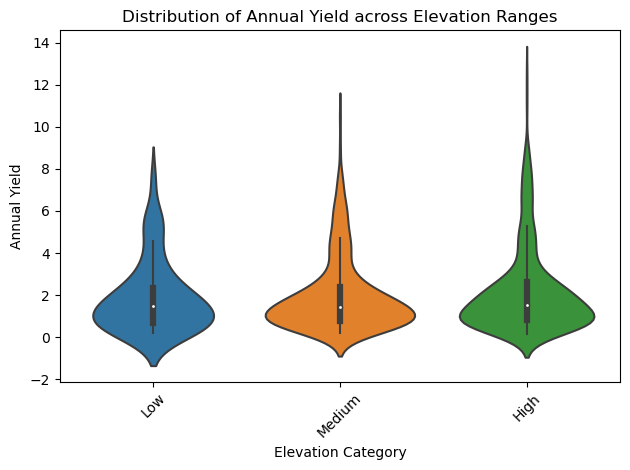

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Replace "path/to/your/file.csv" with the actual path to your file
df = pd.read_csv("MD_agric_exam-4313.csv")

# Assuming the columns are named "Elevation" and "Annual_yield" (change if different)
# Convert elevation to categories
df["Elevation_category"] = pd.cut(df["Elevation"], bins=[0, 300, 600, float('inf')], labels=['Low', 'Medium', 'High'])

# Create the violin plot
sns.violinplot(
    x = "Elevation_category",
    y = "Annual_yield",
    showmeans=True,
    data=df
)

# Customize the plot (optional)
plt.title("Distribution of Annual Yield across Elevation Ranges")
plt.xlabel("Elevation Category")
plt.ylabel("Annual Yield")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Display the plot
plt.tight_layout()
plt.show()


In [17]:
def sum_crop_lengths_recursive(data):
  """
  Calculates the sum of integer values (length) for each unique crop type in the data recursively.

  Args:
      data: A DataFrame containing a 'Crop_type' column.

  Returns:
      The total sum of integer values for all unique crop types.
  """

  # Assuming the column is named "Crop_type" (change if different)
  unique_crops = data["Crop_type"].unique()

  # Calculate and return the total sum
  return sum(len(crop_type) for crop_type in unique_crops)

# Replace "path/to/your/file.csv" with the actual path to your file
df = pd.read_csv("MD_agric_exam-4313.csv")

# Calculate and print the total sum
total_sum = sum_crop_lengths_recursive(df)
print(f"Total sum of crop type lengths: {total_sum}")


Total sum of crop type lengths: 42


In [18]:
import pandas as pd
from scipy import stats

# Replace "path/to/your/file.csv" with the actual path to your file
df = pd.read_csv("MD_agric_exam-4313.csv")

# Assuming the columns are named "Crop_type" and "Annual_yield" (change if different)
# Filter data for 'coffee' and 'banana' crops
coffee_data = df[df['Crop_type'] == 'coffee']['Annual_yield']
banana_data = df[df['Crop_type'] == 'banana']['Annual_yield']

# Perform t-test and round p-value to 3 decimal places
t_statistic, p_value = stats.ttest_ind(coffee_data, banana_data, equal_var=False)
p_value_rounded = round(p_value, 3)

print(f"p-value (rounded to 3 decimal places): {p_value_rounded}")


p-value (rounded to 3 decimal places): 0.598
